In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

In [2]:
# 定义CNN模型
class MNISTCNN(nn.Module):
    def __init__(self):
        super(MNISTCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # 输入通道1，输出通道32，卷积核3x3 
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # 输入通道32，输出通道64，卷积核3x3 
        self.fc1 = nn.Linear(64 * 14 * 14, 128)  # 全连接层，输入特征数为64*14*14，输出特征数128
        self.fc2 = nn.Linear(128, 10)  # 全连接层，输入特征数128，输出特征数10（数字0-9）

    def forward(self, x):
        x = F.relu(self.conv1(x))  # 激活函数使用ReLU :32*28*28
        x = F.relu(self.conv2(x))  # :64*28*28
        x = F.max_pool2d(x, 2)  #:64*14*14
        x = x.view(-1, 64 * 14 * 14)  # 展平特征图
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)  # 使用log_softmax作为输出


60000 10000
torch.Size([1, 28, 28])


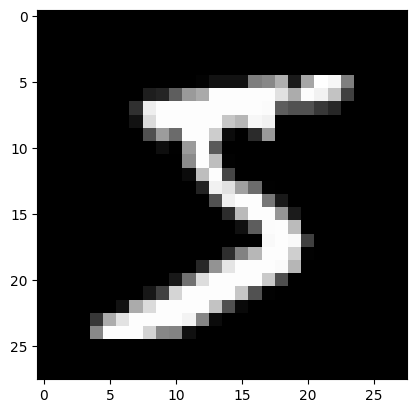

In [3]:
# 设置设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 加载数据集
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)
print(train_dataset.__len__(), test_dataset.__len__())
print(train_dataset[0][0].shape)
image, label = train_dataset[0]
# 显示图像
plt.imshow(image.squeeze(), cmap='gray')

In [4]:

# 初始化模型、损失函数和优化器
model = MNISTCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [5]:
# 训练模型
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(
                f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')


# 测试模型
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    print(
        f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n'
    )



In [ ]:
# 运行训练和测试
for epoch in range(1, 5):  # 训练10个epoch
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.323076
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.131985
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.081396
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.051291
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.019726
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.086819
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.037089
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.215471
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.017529
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.019716

Test set: Average loss: 0.0001, Accuracy: 9815/10000 (98%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.034291
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.021964
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.004529
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.045080
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.045272
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.100954
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.026836
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.012034
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.098846
T